In [1]:
import pandas as pd

ratings = pd.read_csv(r'D:\ml-100k\ml-100k\u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

movies = pd.read_csv(r'D:\ml-100k\ml-100k\u.item', sep='|', encoding='latin-1', names=[
    'movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 
    'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
])

from IPython.display import display
display(ratings.head())
display(movies.head())

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2]:
print(ratings.info())
print(ratings.describe())

print(movies.info())

print(ratings['movie_id'].value_counts().head())

print(ratings['user_id'].value_counts().head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
            user_id       movie_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
<class 'pandas.core.frame.DataFrame'>


rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


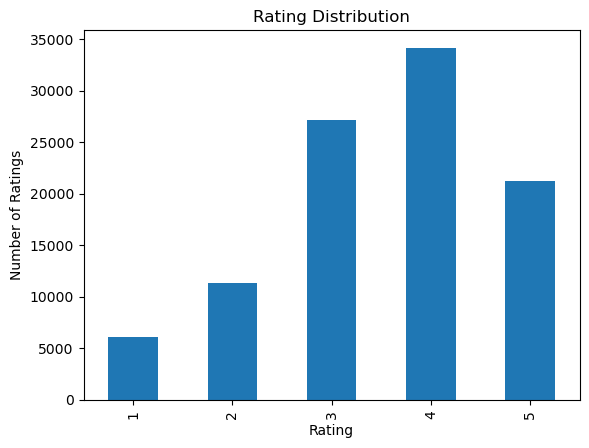

movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64


In [3]:
import matplotlib.pyplot as plt

# 1. How many times each rating occurs
rating_counts = ratings['rating'].value_counts().sort_index()
print(rating_counts)

# 2. Histogram of ratings
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Rating Distribution')
plt.show()

# 3. Average rating per movie
avg_ratings = ratings.groupby('movie_id')['rating'].mean()
print(avg_ratings.head())

In [4]:
user_movie_matrix = ratings.pivot_table(index='user_id', columns='movie_id', values='rating')
user_movie_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Replace NaN with 0 for similarity calculation..
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))

# Converting it to dataframe..
import pandas as pd
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=user_movie_matrix.index, 
                                  columns=user_movie_matrix.index)

user_similarity_df.head()


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
2,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
3,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
4,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
5,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


In [17]:
import numpy as np

def predict_rating(user_id, movie_id):
    # getting similarity scores with other users
    sim_scores = user_similarity_df[user_id]

    #getting that movies ratings by all users
    movie_ratings = user_movie_matrix[movie_id]

    #making a boolean array with true for when the user has given a rating
    mask = movie_ratings.notna()

    #if no user has rated that movie
    if mask.sum() == 0:
        return np.nan

    #final rating prediction
    numerator = np.dot(sim_scores[mask], movie_ratings[mask])
    denominator = sim_scores[mask].sum()

    # Avoid dividing by zero
    if denominator == 0:
        return np.nan

    return numerator / denominator

In [18]:
#testing the prediction function
user_id = 100
movie_id = 25

predicted = predict_rating(user_id, movie_id)
movie_title = movies.loc[movies['movie_id'] == movie_id, 'title'].values[0]
print(f"Predicted rating for user {user_id} on '{movie_title}': {predicted:.2f}")


Predicted rating for user 100 on 'Birdcage, The (1996)': 3.44


In [19]:
def recommend_movies(user_id, movies_df, ratings_df, num_recommendations=5):
    # Movies the user has already rated
    rated_movies = ratings_df[ratings_df['user_id'] == user_id]['movie_id'].tolist()

    # All available movies
    all_movies = movies_df['movie_id'].tolist()

    # Filter out the movies already rated
    unrated_movies = [m for m in all_movies if m not in rated_movies]

    predictions = []

    for movie_id in unrated_movies:
        pred = predict_rating(user_id, movie_id)
        if not np.isnan(pred):
            predictions.append((movie_id, pred))

    # Sort movies by predicted rating (highest first)
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Take top N
    top_movies = predictions[:num_recommendations]

    recommended = []
    for mid, rating in top_movies:
        title = movies_df.loc[movies_df['movie_id'] == mid, 'title'].values[0]
        recommended.append((title, rating))

    return recommended

In [20]:
user_id = 5
recommendations = recommend_movies(user_id, movies, ratings, num_recommendations=5)

for title, score in recommendations:
    print(f"{title} — Predicted Rating: {score:.2f}")

Great Day in Harlem, A (1994) — Predicted Rating: 5.00
They Made Me a Criminal (1939) — Predicted Rating: 5.00
Prefontaine (1997) — Predicted Rating: 5.00
Marlene Dietrich: Shadow and Light (1996)  — Predicted Rating: 5.00
Star Kid (1997) — Predicted Rating: 5.00
